In [1]:

import between_softwares_and_versions as bt

import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
!pwd

/lustre06/project/6061841/niusham/mca_linear_registration


In [2]:


parent_path = Path("/home/niusham/projects/rrg-jbpoline/niusham/mca_linear_registration/outputs_plots/diagrams")
softwares = ["spm", "flirt", "ants"]
templates = ["MNI152NLin2009cAsym_res-01", "MNI152NLin2009cSym_res-1"]

def func_fd_passed(s, t):
        return "FD_fine_all.txt"

data = bt.read_all_versions(parent_path, softwares, templates, [func_fd_passed], dtype=float)

/tmp/ipykernel_3183067/2740342942.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = all_data.groupby('software - template')['value'].median()
/tmp/ipykernel_3183067/2740342942.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='software - template', y='value', data=all_data, size=3, palette="Set2")
/home/niusham/projects/rrg-jbpoline/niusham/mca_linear_registration/.venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/niusham/projects/rrg-jbpoline/niusham/mca_linear_

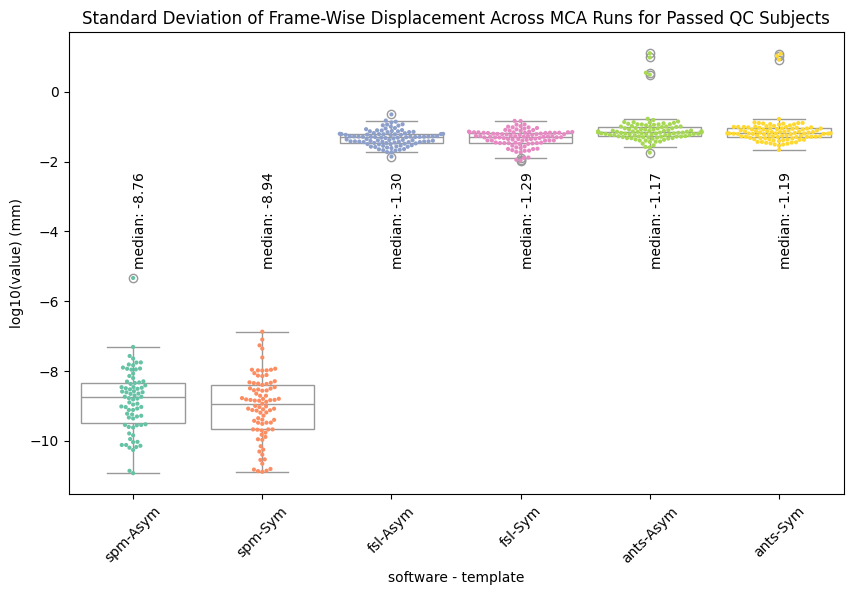

In [3]:
dfs = []
new_labels = ["spm-Asym", "spm-Sym", "fsl-Asym", "fsl-Sym", "ants-Asym", "ants-Sym"]
labels = []
for software, templates in data.items():
    for template, array in templates.items():
        df = pd.DataFrame({
            'software - template': f"{software} - {template}",
            'value': np.log10(np.std(array, axis=1))
        })
        labels.append(f"{software} - {template}")
        dfs.append(df)

all_data = pd.concat(dfs)
all_data['software - template'] = pd.Categorical(all_data['software - template'], categories=labels, ordered=True)
medians = all_data.groupby('software - template')['value'].median()
plt.figure(figsize=(10, 6))
sns.swarmplot(x='software - template', y='value', data=all_data, size=3, palette="Set2")
sns.boxplot(x='software - template', y='value', data=all_data, color="white")
for i, median in enumerate(medians.keys()):
     plt.text(i, -5, f"median: {medians[median]:.2f}", fontsize=10, rotation=90)
#medians[median] - 1
plt.title('Standard Deviation of Frame-Wise Displacement Across MCA Runs for Passed QC Subjects')
plt.ylabel('log10(value) (mm)')
plt.xticks(ticks=list(range(6)), rotation=45, labels=new_labels)
plt.show()


/tmp/ipykernel_1431355/157074567.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = all_data.groupby('software - template')['value'].median()
/tmp/ipykernel_1431355/157074567.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='software - template', y='value', data=all_data, palette="Set2", size=4)
/home/niusham/projects/rrg-jbpoline/niusham/mca_linear_registration/.venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


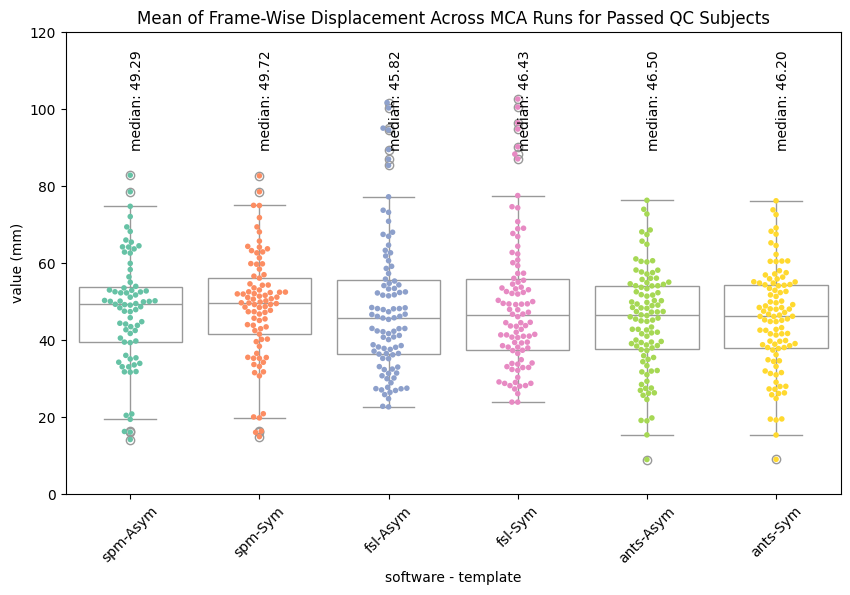

In [10]:
def func_fd_passed(s, t):
        return "FD_fine_all.txt"

data = bt.read_all_versions(parent_path, softwares, templates, [func_fd_passed], dtype=float)


dfs = []
numps = []
new_labels = ["spm-Asym", "spm-Sym", "fsl-Asym", "fsl-Sym", "ants-Asym", "ants-Sym"]
for software, templates in data.items():
    for template, array in templates.items():
        df = pd.DataFrame({
            'software - template': f"{software} - {template}",
            'value': np.mean(array, axis=1)
        })
        dfs.append(df)
        numps.append(np.std(array, axis=1))

all_data = pd.concat(dfs)
all_data['software - template'] = pd.Categorical(all_data['software - template'], categories=labels, ordered=True)
medians = all_data.groupby('software - template')['value'].median()
plt.figure(figsize=(10, 6))
sns.swarmplot(x='software - template', y='value', data=all_data, palette="Set2", size=4)
sns.boxplot(x='software - template', y='value', data=all_data, color="white")
for i, median in enumerate(medians.keys()):
     plt.text(i, 90, f"median: {medians[median]:.2f}", fontsize=10, rotation=90)
# medians[median] -10
plt.title('Mean of Frame-Wise Displacement Across MCA Runs for Passed QC Subjects')
plt.ylabel('value (mm)')
plt.xticks(ticks=list(range(6)), rotation=45, labels=new_labels)
plt.ylim((0,120))
plt.show()

In [11]:
def func_fd_passed(s, t):
        return "FD_failed_all.txt"

data = bt.read_all_versions(parent_path, softwares, templates, [func_fd_passed], dtype=float)



In [15]:
np.std(data['spm']['MNI152NLin2009cAsym_res-01'], axis=1).shape

(26,)

In [ ]:
def read_all_versions(parent_path, softwares, templates, name_patterns, dtype=float, costfunc=False):
    parent_path = Path(parent_path)
    data = {software: {template: None for template in templates} for software in softwares}

    for software in softwares:
        for template in templates:
            data_list = []
            for name_pattern in name_patterns:
                name = name_pattern(software, template)
                path = parent_path / costfunc/ software / template / name
                # "arrays" /
                if path.exists():
                    data_list.append(np.loadtxt(path, dtype=dtype))
            if data_list:
                data[software][template] = np.concatenate(data_list)

    return data

In [ ]:
parent_path = Path("/home/niusham/projects/rrg-jbpoline/niusham/mca_linear_registration/outputs_plots/diagrams")
softwares = ["spm", "flirt", "ants"]
templates = ["MNI152NLin2009cAsym_res-01", "MNI152NLin2009cSym_res-1"]

def func_fd_passed(s, t):
        return "FD_fine_all.txt"

data = bt.read_all_versions(parent_path, softwares, templates, [func_fd_passed], dtype=float)